# Inferential Statistics
## Business Stock Prices Comparison


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import ttest_ind, ttest_rel, pearsonr
from sklearn import preprocessing

In [ ]:
# Load the data from the csv files
df_loreal = pd.read_csv('../Data/loreal_stock_price.csv',parse_dates=['Date'], index_col='Date')
df_unilever = pd.read_csv('../Data/unilever_stock_price.csv',parse_dates=['Date'], index_col='Date')
df_estee_lauder = pd.read_csv('../Data/estee_stock_price.csv',parse_dates=['Date'], index_col='Date')

In [ ]:
# Pick the closing prices
loreal_close = df_loreal['Close']
unilever_close = df_unilever['Close']
estee_close = df_estee_lauder['Close']

In [ ]:
# Use the MinMaxScaler to scale the data - Data Normalization
scaler = preprocessing.MinMaxScaler()
loreal_close_scaled = scaler.fit_transform(loreal_close.values.reshape(-1, 1))
unilever_close_scaled = scaler.fit_transform(unilever_close.values.reshape(-1, 1))
estee_close_scaled = scaler.fit_transform(estee_close.values.reshape(-1, 1))

In [ ]:
# Convert the scaled data to pandas Series
loreal_close_scaled = pd.Series(loreal_close_scaled.flatten(), index=loreal_close.index)
unilever_close_scaled = pd.Series(unilever_close_scaled.flatten(), index=unilever_close.index)
estee_close_scaled = pd.Series(estee_close_scaled.flatten(), index=estee_close.index)

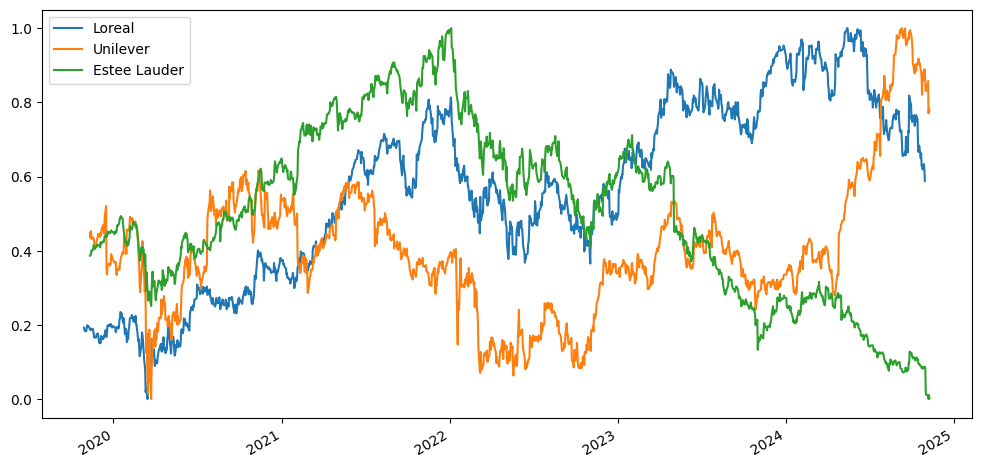

In [72]:
plt.figure(figsize=(12,6))
loreal_close_scaled.plot(label='Loreal')
unilever_close_scaled.plot(label='Unilever')
estee_close_scaled.plot(label='Estee Lauder')
plt.legend()
plt.show()

In [47]:
ttest_ind(loreal_close_scaled, unilever_close_scaled, alternative='greater', equal_var=False)

TtestResult(statistic=19.146394528201444, pvalue=1.9549703856186192e-76, df=2389.641418771853)

In [48]:
ttest_ind(loreal_close_scaled, estee_close_scaled, alternative='greater', equal_var=False)

TtestResult(statistic=6.751506214347406, pvalue=9.03439844717611e-12, df=2538.957492877964)

In [ ]:
# Convert the index to datetime (date only)
loreal_close_scaled.index = pd.to_datetime(loreal_close_scaled.index, utc=True)
loreal_close_scaled.index = pd.to_datetime(loreal_close_scaled.index.date)

unilever_close_scaled.index = pd.to_datetime(unilever_close_scaled.index, utc=True)
unilever_close_scaled.index = pd.to_datetime(unilever_close_scaled.index.date)

estee_close_scaled.index = pd.to_datetime(estee_close_scaled.index, utc=True)
estee_close_scaled.index = pd.to_datetime(estee_close_scaled.index.date)

In [69]:
loreal_unilever_join = pd.concat([loreal_close_scaled, unilever_close_scaled], axis=1, join='inner')
loreal_unilever_join.columns = ['Loreal', 'Unilever']

loreal_estee_join = pd.concat([loreal_close_scaled, estee_close_scaled], axis=1, join='inner')
loreal_estee_join.columns = ['Loreal', 'Estee Lauder']

In [70]:
ttest_rel(loreal_unilever_join['Loreal'], loreal_unilever_join['Unilever'])

TtestResult(statistic=19.834189603997295, pvalue=5.7278651866218665e-74, df=989)

In [71]:
ttest_rel(loreal_estee_join['Loreal'], loreal_estee_join['Estee Lauder'])

TtestResult(statistic=5.493636596607645, pvalue=5.007885286451241e-08, df=989)